<a href="https://colab.research.google.com/github/IshmitaKaur/AI--Assignment-1/blob/main/ResaleFlatPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Business Case
# Assuming you are working in a bank and a customer is requesting for house loan
# You need to estimate the amount of loan you could grant to the customer
# Hence you need to estimate the value of the house
# You are to create model to predict the value of the house using machine learning model
# There are 10 attributes and you have finally decided on 'town', 'flat_type','floor_area_sqm','flat_model', 'lease_commence_date'.
# Remember to use dummy variables on categorical input => you should have 55 columns include Y
# Normalize floor_area_sqm using zscore before split (**)
# Remember to split train test using default rates
# All machine learning use default setting
# measurement is rmse
# random state is 1 (need to use in train test split and model creation)
# data visualization is needed. At least use one of pandas, seaborn and matplotlib.
# the results rmse should be regression 62455, Decision Tree 43711,Random Forest 40131, GBoost 62325, NN 151107 (4 significant figure)
# how to improve the results by change the features selected, data wrangling or parameter setting including using keras and tensorflow.
# Qualitatively, explain the pros and cons about your model
# How to overcome the weakness of your model (future study)
# the important of your model to the bank
#apply orange on all the models.
# Good luck, Enjoy doing your homework

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/IshmitaKaur/AI--Assignment-1/main/ResaleFlatPrice.csv")

In [6]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2019-01,ANG MO KIO,3 ROOM,330,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,61 years 01 month,270000.0
1,2019-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,56 years 04 months,295000.0
2,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1978,58 years 01 month,270000.0
3,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,01 TO 03,67.0,New Generation,1978,58 years,230000.0
4,2019-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,61 years,262500.0
...,...,...,...,...,...,...,...,...,...,...,...
22199,2019-12,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,67 years 07 months,580000.0
22200,2019-12,YISHUN,EXECUTIVE,326,YISHUN RING RD,07 TO 09,146.0,Maisonette,1988,67 years 07 months,565000.0
22201,2019-12,YISHUN,EXECUTIVE,608,YISHUN ST 61,01 TO 03,164.0,Apartment,1992,71 years 06 months,633000.0
22202,2019-12,YISHUN,EXECUTIVE,604,YISHUN ST 61,10 TO 12,164.0,Apartment,1992,71 years 06 months,788888.0


In [7]:
df = df.dropna()

In [8]:
df["flat_model"].value_counts()

Model A                   7664
Improved                  5560
New Generation            3056
Premium Apartment         2122
Simplified                 930
Apartment                  816
Maisonette                 662
Standard                   647
DBSS                       310
Model A2                   254
Model A-Maisonette          46
Adjoined flat               46
Type S1                     37
Type S2                     16
Terrace                     14
Multi Generation            14
Premium Apartment Loft       4
Premium Maisonette           4
Improved-Maisonette          2
Name: flat_model, dtype: int64

In [9]:
df = df.loc[:, ['town', 'flat_type', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price']]

In [10]:
df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,ANG MO KIO,3 ROOM,68.0,New Generation,1981,270000.0
1,ANG MO KIO,3 ROOM,73.0,New Generation,1976,295000.0
2,ANG MO KIO,3 ROOM,67.0,New Generation,1978,270000.0
3,ANG MO KIO,3 ROOM,67.0,New Generation,1978,230000.0
4,ANG MO KIO,3 ROOM,68.0,New Generation,1981,262500.0
...,...,...,...,...,...,...
22199,YISHUN,EXECUTIVE,142.0,Apartment,1988,580000.0
22200,YISHUN,EXECUTIVE,146.0,Maisonette,1988,565000.0
22201,YISHUN,EXECUTIVE,164.0,Apartment,1992,633000.0
22202,YISHUN,EXECUTIVE,164.0,Apartment,1992,788888.0


In [11]:
from scipy import stats

In [12]:
df["floor_area_sqm"] = stats.zscore(df["floor_area_sqm"])

In [13]:
dummy = pd.get_dummies(df["town"])

In [14]:
df = df.merge(dummy, left_index=True, right_index=True).drop(columns="town")

In [15]:
df

,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,3 ROOM,-1.193788,New Generation,1981,270000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 ROOM,-0.988498,New Generation,1976,295000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 ROOM,-1.234846,New Generation,1978,270000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 ROOM,-1.234846,New Generation,1978,230000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 ROOM,-1.193788,New Generation,1981,262500.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22199,EXECUTIVE,1.844515,Apartment,1988,580000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22200,EXECUTIVE,2.008748,Maisonette,1988,565000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22201,EXECUTIVE,2.747795,Apartment,1992,633000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22202,EXECUTIVE,2.747795,Apartment,1992,788888.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
df["flat_type"].value_counts()

4 ROOM              9231
3 ROOM              5433
5 ROOM              5431
EXECUTIVE           1669
2 ROOM               415
MULTI-GENERATION      14
1 ROOM                11
Name: flat_type, dtype: int64

In [17]:
dummy = pd.get_dummies(df["flat_type"])

In [18]:
df = df.merge(dummy, left_index=True, right_index=True).drop(columns="flat_type")

In [19]:
df["flat_model"].value_counts()

Model A                   7664
Improved                  5560
New Generation            3056
Premium Apartment         2122
Simplified                 930
Apartment                  816
Maisonette                 662
Standard                   647
DBSS                       310
Model A2                   254
Model A-Maisonette          46
Adjoined flat               46
Type S1                     37
Type S2                     16
Terrace                     14
Multi Generation            14
Premium Apartment Loft       4
Premium Maisonette           4
Improved-Maisonette          2
Name: flat_model, dtype: int64

In [20]:
dummy = pd.get_dummies(df["flat_model"])

In [21]:
df = df.merge(dummy, left_index=True, right_index=True).drop(columns="flat_model")

In [22]:
df

,floor_area_sqm,lease_commence_date,resale_price,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,-1.193788,1981,270000.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.988498,1976,295000.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-1.234846,1978,270000.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-1.234846,1978,230000.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.193788,1981,262500.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22199,1.844515,1988,580000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22200,2.008748,1988,565000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22201,2.747795,1992,633000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22202,2.747795,1992,788888.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X = df.drop(columns="resale_price")
Y = df["resale_price"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)

In [26]:
from sklearn import linear_model

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
model = linear_model.LinearRegression()

In [29]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print("rmse is", mean_squared_error(Y_test, pred)**0.5)

rmse is 62455.431314234214


In [30]:
from sklearn import tree

In [31]:
model = tree.DecisionTreeRegressor(random_state=1)

In [32]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print("rmse is", mean_squared_error(Y_test, pred)**0.5)

rmse is 43711.16010257397


In [33]:
from sklearn import ensemble

In [34]:
model = ensemble.RandomForestRegressor(random_state=1)

In [35]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print("rmse is", mean_squared_error(Y_test, pred)**0.5)

rmse is 40131.48387287037


In [36]:
model = ensemble.GradientBoostingRegressor(random_state=1)

In [37]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print("rmse is", mean_squared_error(Y_test, pred)**0.5)

rmse is 62325.73754141881


In [38]:
from sklearn import neural_network

In [39]:
model = neural_network.MLPRegressor(random_state=1)

In [40]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print("rmse is", mean_squared_error(Y_test, pred)**0.5)

rmse is 151107.6835284498


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [94]:
from keras.models import Sequential

In [109]:
from keras.layers import Dense, Dropout

In [110]:
model = Sequential()

In [111]:
model.add(Dense(54, input_dim=54, activation= "relu"))
model.add(Dropout(0.2))

In [112]:
model.add(Dense(54, activation= "relu"))
model.add(Dropout(0.2))

In [113]:
model.add(Dense(1, activation= "linear"))
model.add(Dropout(0.2))

In [114]:
model.compile(loss="mse", optimizer= "adam", metrics=["mse"])

In [115]:
history = model.fit(X_train, Y_train, batch_size=2, epochs=30)

Epoch 1/30
8327/8327 [==============================] - 22s 3ms/step - loss: 68691226624.0000 - mse: 68691226624.0000
Epoch 2/30
8327/8327 [==============================] - 22s 3ms/step - loss: 63605825536.0000 - mse: 63605825536.0000
Epoch 3/30
8327/8327 [==============================] - 22s 3ms/step - loss: 63338696704.0000 - mse: 63338696704.0000
Epoch 4/30
8327/8327 [==============================] - 22s 3ms/step - loss: 63266570240.0000 - mse: 63266570240.0000
Epoch 5/30
8327/8327 [==============================] - 23s 3ms/step - loss: 60812328960.0000 - mse: 60812328960.0000
Epoch 6/30
8327/8327 [==============================] - 22s 3ms/step - loss: 59580071936.0000 - mse: 59580071936.0000
Epoch 7/30
8327/8327 [==============================] - 22s 3ms/step - loss: 58773188608.0000 - mse: 58773188608.0000
Epoch 8/30
8327/8327 [==============================] - 22s 3ms/step - loss: 55876968448.0000 - mse: 55876968448.0000
Epoch 9/30
8327/8327 [==============================] - 

In [105]:
import matplotlib.pyplot as plt


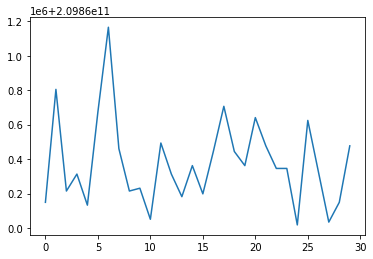

In [106]:
plt.plot(history.history['mse'])

In [107]:
result = model.evaluate(X_test, Y_test)

174/174 [==============================] - 1s 4ms/step - loss: 211946160128.0000 - mse: 211946160128.0000


In [108]:
result[1]**0.5

460376.1072514515